In [5]:
import numpy as np
import statsmodels.api as sm
import graphviz

### Generating data

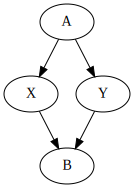

In [6]:
# Create a directed graph
g_1 = graphviz.Digraph(format='png')

# Add nodes
nodes_1 = ['A', 'X', 'B', 'Y']
[g_1.node(n) for n in nodes_1]

g_1.edges(['AX', 'XB', 'AY', 'YB'])
g_1

In [12]:
np.random.seed(0)
n = 5000
a = np.random.randn(n)
x = 2 * a + 0.5 * np.random.randn(n)
y = 2 * a + 0.5 * np.random.randn(n)
b = 1.5 * x + 0.75 * y

Note that all the coefficients that we use to scale the variables are arbitrarily chosen.

In [15]:
# Define four model variants
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]
mod = ['1,x','1,x,a','1,x,b','1,x,a,b']
# Fit models iteratively and store the results
count  = 0
for variant in variants:
    X = sm.add_constant(np.stack(variant).T)
    model = sm.OLS(y, X)
    fitted_model = model.fit()
    print(f'Model {count+1}: [{mod[count]}]')
    print(f'Params: {fitted_model.params.round(3)}')
    print(f'p-vals: {fitted_model.pvalues.round(3)}')
    print(f'Signif: {fitted_model.pvalues <= .05}\n')
    count += 1

Model 1: [1,x]
Params: [0.011 0.94 ]
p-vals: [0.246 0.   ]
Signif: [False  True]

Model 2: [1,x,a]
Params: [3.000e-03 1.000e-03 1.997e+00]
p-vals: [0.702 0.959 0.   ]
Signif: [False False  True]

Model 3: [1,x,b]
Params: [ 0.    -2.     1.333]
p-vals: [0. 0. 0.]
Signif: [ True  True  True]

Model 4: [1,x,a,b]
Params: [ 0.    -2.    -0.     1.333]
p-vals: [0. 0. 0. 0.]
Signif: [ True  True  True  True]

